<a href="https://colab.research.google.com/github/yakaHan/Tugas/blob/main/Tugas_Module_7_Big_Data_Fundamental_ResponsiCOPY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TUGAS MODULE 7 BIGDATA FUNDAMENTAL RESPONSI


### Isikan data diri
*   Nama : Nayaka Hananadhif Adinata
*   Nim : 23.01.5022

####BRIEF:
Analisis Kinerja Penjualan Toko Retail Sederhana
####Dataset: https://www.kaggle.com/datasets/bravehart101/sample-supermarket-dataset

Tugas yang Harus Diselesaikan:
* Preprocessing Data (Sederhana)
* EDA (Exploratory Data Analysis)
* Pertanyaan Analitis



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd

In [3]:
df = pd.read_csv('/content/drive/MyDrive/SampleSuperstore.csv')

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB
None


In [11]:
import numpy as np

# a. Cek missing values
print("Missing values:\n", df.isnull().sum())

# b. Handle missing values
df.fillna(0, inplace=True)

# c. Cek duplikat
print("Duplikat:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

Missing values:
 Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64
Duplikat: 0


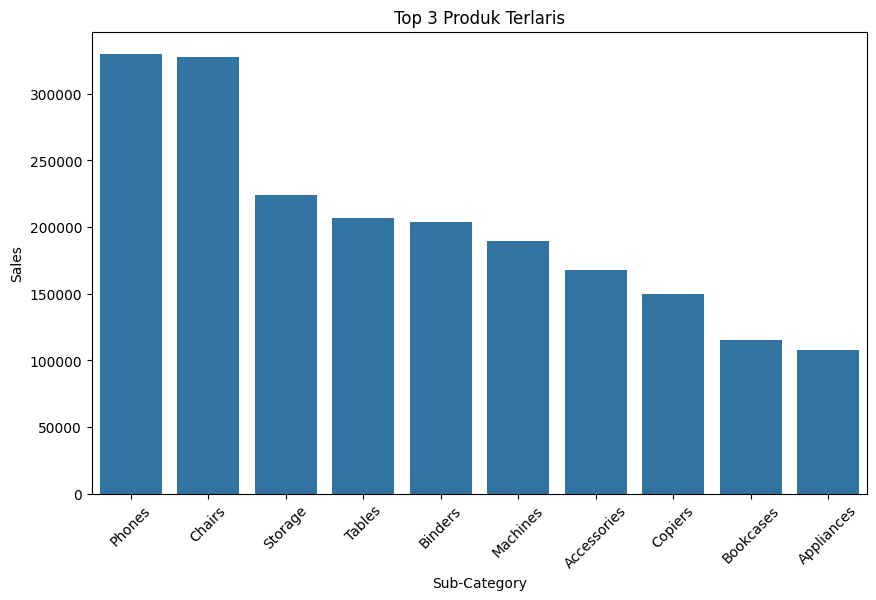

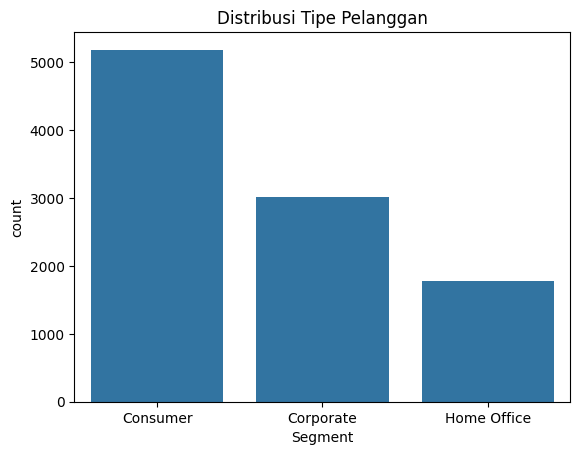

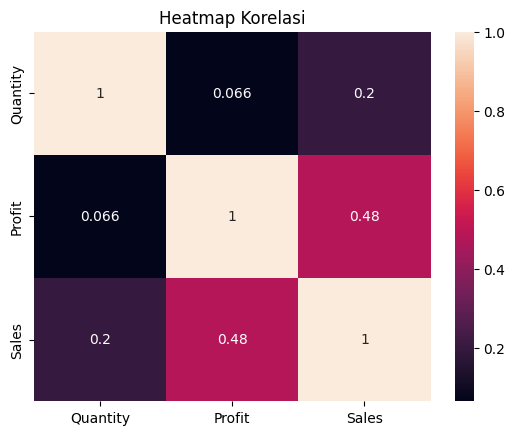

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
# b. Distribusi penjualan per produk
plt.figure(figsize=(10, 6))
sns.barplot(x='Sub-Category', y='Sales', data=df.groupby('Sub-Category')['Sales'].sum().reset_index().sort_values('Sales', ascending=False).head(10))
plt.xticks(rotation=45)
plt.title('Top 10 Produk Terlaris')
plt.show()

# c. Pola pembelian per customer type
sns.countplot(x='Segment', data=df)
plt.title('Distribusi Tipe Pelanggan')
plt.show()

# d. Korelasi antar variabel numerik
sns.heatmap(df[['Quantity', 'Profit', 'Sales']].corr(), annot=True)
plt.title('Heatmap Korelasi')
plt.show()

Q1: Produk apa yang paling menguntungkan?

In [23]:
profit_product = df.groupby('Category')['Sales'].sum().sort_values(ascending=False).head(1)
print("Produk paling menguntungkan:", profit_product.index[0])

Produk paling menguntungkan: Technology


Q2: Tipe Pelanggan apa yang sering Membeli?

In [34]:
member_stats = df.groupby('Segment')['Quantity'].sum()
print("Perbandingan pembelian:\n", member_stats)

Perbandingan pembelian:
 Segment
Consumer       19497
Corporate      11591
Home Office     6732
Name: Quantity, dtype: int64


Q3 : Apakah bisa melihat perbandingan quantity penjualan tiap kota?

In [40]:
member_stats = df.groupby('City')['Quantity'].sum()
print("Perbandingan pembelian (seluruh kota):")
for city, total_quantity in member_stats.items():
    print(f"{city}: {total_quantity}")

Perbandingan pembelian (seluruh kota):
Aberdeen: 3
Abilene: 2
Akron: 65
Albuquerque: 65
Alexandria: 84
Allen: 13
Allentown: 20
Altoona: 9
Amarillo: 32
Anaheim: 112
Andover: 13
Ann Arbor: 23
Antioch: 3
Apopka: 31
Apple Valley: 32
Appleton: 12
Arlington: 259
Arlington Heights: 6
Arvada: 10
Asheville: 28
Athens: 30
Atlanta: 156
Atlantic City: 2
Auburn: 80
Aurora: 258
Austin: 131
Avondale: 30
Bakersfield: 47
Baltimore: 184
Bangor: 29
Bartlett: 8
Bayonne: 9
Baytown: 2
Beaumont: 21
Bedford: 25
Belleville: 32
Bellevue: 18
Bellingham: 24
Bethlehem: 18
Beverly: 15
Billings: 2
Bloomington: 58
Boca Raton: 8
Boise: 9
Bolingbrook: 23
Bossier City: 24
Bowling Green: 30
Boynton Beach: 28
Bozeman: 5
Brentwood: 66
Bridgeton: 6
Bristol: 31
Broken Arrow: 17
Broomfield: 23
Brownsville: 27
Bryan: 27
Buffalo: 46
Buffalo Grove: 10
Bullhead City: 3
Burbank: 13
Burlington: 105
Caldwell: 11
Camarillo: 16
Cambridge: 19
Canton: 13
Carlsbad: 35
Carol Stream: 18
Carrollton: 50
Cary: 19
Cedar Hill: 6
Cedar Rapids: 3

#### PREPROCESSING DATA


* Import Data:
* Pemberihan Data



##EDA


*   Analisis Deskriptif:
    - Berapa total penjualan untuk setiap kategori (Category)?
    - Berapa total penjualan untuk setiap sub kategori?
    - Berapa total penjualan untuk setiap state?
*   Visualisasi
    - Bar chart: Total penjualan per sub-kategori.
    - Pie chart: Distribusi penjualan berdasarkan region.
    - Scatter plot: Hubungan antara Sales vs. region.
*   Analisis Profitabilitas
    - Apakah ada korelasi antara state, category, sub-category dan sales?



## Pertanyaan Analitis
- Region mana yang paling menghasilkan penjualan (sales) yang besar?
- Apakah produk dengan sales terbesar?
- Rekomendasikan 3 sub-kategori yang perlu diprioritaskan untuk meningkatkan profit!